# Multi-dimensional data access with Xarray

![](http://xarray.pydata.org/en/stable/_images/dataset-diagram.png)

Henrik Andersson, 2021-01-20

In [ ]:
!uname -a

Linux 6ab2b9de182d 4.19.112+ #1 SMP Thu Jul 23 08:00:38 PDT 2020 x86_64 x86_64 x86_64 GNU/Linux


In [ ]:
!lsb_release -a

No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 18.04.5 LTS
Release:	18.04
Codename:	bionic


# Dependencies
* grib
* netcdf

In [ ]:
! apt-get install libeccodes0

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libeccodes-data
The following NEW packages will be installed:
  libeccodes-data libeccodes0
0 upgraded, 2 newly installed, 0 to remove and 15 not upgraded.
Need to get 2,861 kB of archives.
After this operation, 66.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libeccodes-data all 2.6.0-2 [1,260 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libeccodes0 amd64 2.6.0-2 [1,601 kB]
Fetched 2,861 kB in 1s (2,187 kB/s)
Selecting previously unselected package libeccodes-data.
(Reading database ... 146456 files and directories currently installed.)
Preparing to unpack .../libeccodes-data_2.6.0-2_all.deb ...
Unpacking libeccodes-data (2.6.0-2) ...
Selecting previously unselected package libeccodes0:amd64.
Preparing to unpack .../libeccodes0_2.6.0-2_amd64.deb ...
Unpacking

In [ ]:
!pip install netcdf4 eccodes cfgrib

     |████████████████████████████████| 4.7MB 6.0MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 317kB 27.7MB/s 


First step is to download the data (later we will try an alternative where data subsets are downloaded on demand).

In [ ]:
!curl  -O https://opendata.dwd.de/weather/nwp/cosmo-d2/grib/00/pmsl/cosmo-d2_germany_regular-lat-lon_single-level_2021012100_000_PMSL.grib2.bz2
!bzip2 -d cosmo-d2_germany_regular-lat-lon_single-level_2021012100_000_PMSL.grib2.bz2

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  610k  100  610k    0     0  2655k      0 --:--:-- --:--:-- --:--:-- 2643k
bzip2: Output file cosmo-d2_germany_regular-lat-lon_single-level_2021012100_000_PMSL.grib2 already exists.


In [ ]:
!ls *.grib2

cosmo-d2-eps_germany_rotated-lat-lon_single-level_2021012100_000_pmsl.grib2
cosmo-d2_germany_regular-lat-lon_single-level_2021012100_000_PMSL.grib2


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
import xarray as xr

# Deterministic forecast

In [ ]:
ds = xr.open_dataset("cosmo-d2_germany_regular-lat-lon_single-level_2021012100_000_PMSL.grib2", engine="cfgrib")
ds

<xarray.Dataset>
Dimensions:     (latitude: 701, longitude: 851)
Coordinates:
    time        datetime64[ns] ...
    step        timedelta64[ns] ...
    meanSea     int64 ...
  * latitude    (latitude) float64 43.0 43.02 43.04 43.06 ... 56.96 56.98 57.0
  * longitude   (longitude) float64 0.0 0.02 0.04 0.06 ... 16.96 16.98 17.0
    valid_time  datetime64[ns] ...
Data variables:
    prmsl       (latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             edzw
    GRIB_centreDescription:  Offenbach 
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Offenbach 
    history:                 2021-01-21T12:12:40 GRIB to CDM+CF via cfgrib-0....

In [ ]:
prmsl = ds["prmsl"]
prmsl

<xarray.DataArray 'prmsl' (latitude: 701, longitude: 851)>
[596551 values with dtype=float32]
Coordinates:
    time        datetime64[ns] 2021-01-21
    step        timedelta64[ns] 00:00:00
    meanSea     int64 0
  * latitude    (latitude) float64 43.0 43.02 43.04 43.06 ... 56.96 56.98 57.0
  * longitude   (longitude) float64 0.0 0.02 0.04 0.06 ... 16.96 16.98 17.0
    valid_time  datetime64[ns] 2021-01-21
Attributes:
    GRIB_paramId:                             260074
    GRIB_shortName:                           prmsl
    GRIB_units:                               Pa
    GRIB_name:                                Pressure reduced to MSL
    GRIB_cfVarName:                           prmsl
    GRIB_dataType:                            fc
    GRIB_missingValue:                        9999
    GRIB_numberOfPoints:                      596551
    GRIB_typeOfLevel:                         meanSea
    GRIB_NV:                                  0
    GRIB_stepUnits:                           1
    GRIB_stepType:                            instant
    GRIB_gridType:                            regular_ll
    GRIB_gridDefinitionDescription:           Latitude/longitude 
    GRIB_Nx:                                  851
    GRIB_iDirectionIncrementInDegrees:        0.02
    GRIB_iScansNegatively:                    0
    GRIB_longitudeOfFirstGridPointInDegrees:  0.0
    GRIB_longitudeOfLastGridPointInDegrees:   17.0
    GRIB_Ny:                                  701
    GRIB_jDirectionIncrementInDegrees:        0.02
    GRIB_jPointsAreConsecutive:               0
    GRIB_jScansPositively:                    1
    GRIB_latitudeOfFirstGridPointInDegrees:   43.0
    GRIB_latitudeOfLastGridPointInDegrees:    57.0
    long_name:                                Pressure reduced to MSL
    units:                                    Pa

In [ ]:
prmsl.attrs

{'GRIB_NV': 0,
 'GRIB_Nx': 851,
 'GRIB_Ny': 701,
 'GRIB_cfVarName': 'prmsl',
 'GRIB_dataType': 'fc',
 'GRIB_gridDefinitionDescription': 'Latitude/longitude ',
 'GRIB_gridType': 'regular_ll',
 'GRIB_iDirectionIncrementInDegrees': 0.02,
 'GRIB_iScansNegatively': 0,
 'GRIB_jDirectionIncrementInDegrees': 0.02,
 'GRIB_jPointsAreConsecutive': 0,
 'GRIB_jScansPositively': 1,
 'GRIB_latitudeOfFirstGridPointInDegrees': 43.0,
 'GRIB_latitudeOfLastGridPointInDegrees': 57.0,
 'GRIB_longitudeOfFirstGridPointInDegrees': 0.0,
 'GRIB_longitudeOfLastGridPointInDegrees': 17.0,
 'GRIB_missingValue': 9999,
 'GRIB_name': 'Pressure reduced to MSL',
 'GRIB_numberOfPoints': 596551,
 'GRIB_paramId': 260074,
 'GRIB_shortName': 'prmsl',
 'GRIB_stepType': 'instant',
 'GRIB_stepUnits': 1,
 'GRIB_typeOfLevel': 'meanSea',
 'GRIB_units': 'Pa',
 'long_name': 'Pressure reduced to MSL',
 'units': 'Pa'}

In [ ]:
prmsl.attrs['units']

'Pa'

In [ ]:
prmsl.time.values

numpy.datetime64('2021-01-21T00:00:00.000000000')

In [ ]:
prmsl.latitude.values[0]

43.0

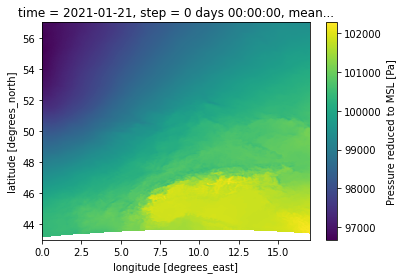

In [ ]:
prmsl.plot()

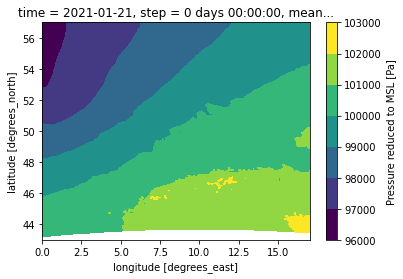

In [ ]:
prmsl.plot.contourf()

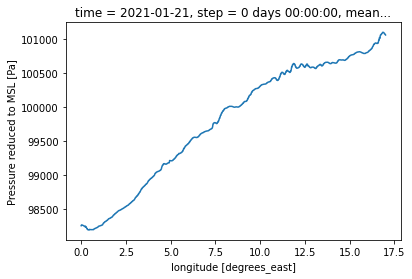

In [ ]:
prmsl.sel(latitude=50.0,method='nearest').plot()

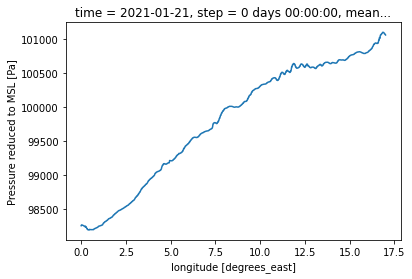

In [ ]:
prmsl.interp(latitude=50.0).plot()

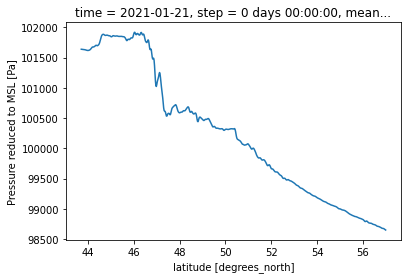

In [ ]:
prmsl.interp(longitude=10.0).plot()

# Ensemble forecast via OpenDAP

In [ ]:
import xarray as xr
ds = xr.open_dataset("http://nomads.ncep.noaa.gov:80/dods/gefs/gefs20210205/gefs_pgrb2ap5_all_00z")
ds


<xarray.Dataset>
Dimensions:      (ens: 31, lat: 361, lev: 12, lon: 720, time: 65)
Coordinates:
  * ens          (ens) float64 1.0 2.0 3.0 4.0 5.0 ... 27.0 28.0 29.0 30.0 31.0
  * time         (time) datetime64[ns] 2021-02-05 ... 2021-02-21
  * lev          (lev) float64 1e+03 925.0 850.0 700.0 ... 200.0 100.0 50.0 10.0
  * lat          (lat) float64 -90.0 -89.5 -89.0 -88.5 ... 88.5 89.0 89.5 90.0
  * lon          (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 358.0 358.5 359.0 359.5
Data variables:
    hgtprs       (ens, time, lev, lat, lon) float32 ...
    apcpsfc      (ens, time, lat, lon) float32 ...
    cape180_0mb  (ens, time, lat, lon) float32 ...
    cfrzrsfc     (ens, time, lat, lon) float32 ...
    cicepsfc     (ens, time, lat, lon) float32 ...
    cin180_0mb   (ens, time, lat, lon) float32 ...
    crainsfc     (ens, time, lat, lon) float32 ...
    csnowsfc     (ens, time, lat, lon) float32 ...
    dlwrfsfc     (ens, time, lat, lon) float32 ...
    dswrfsfc     (ens, time, lat, lon) float32 ...
    icetksfc     (ens, time, lat, lon) float32 ...
    lhtflsfc     (ens, time, lat, lon) float32 ...
    pressfc      (ens, time, lat, lon) float32 ...
    prmslmsl     (ens, time, lat, lon) float32 ...
    pwatclm      (ens, time, lat, lon) float32 ...
    rhprs        (ens, time, lev, lat, lon) float32 ...
    rh2m         (ens, time, lat, lon) float32 ...
    shtflsfc     (ens, time, lat, lon) float32 ...
    snodsfc      (ens, time, lat, lon) float32 ...
    soilw0_10cm  (ens, time, lat, lon) float32 ...
    tcdcclm      (ens, time, lat, lon) float32 ...
    tmax2m       (ens, time, lat, lon) float32 ...
    tmin2m       (ens, time, lat, lon) float32 ...
    tmpprs       (ens, time, lev, lat, lon) float32 ...
    tmp2m        (ens, time, lat, lon) float32 ...
    tsoil0_10cm  (ens, time, lat, lon) float32 ...
    ugrdprs      (ens, time, lev, lat, lon) float32 ...
    ugrd10m      (ens, time, lat, lon) float32 ...
    ulwrfsfc     (ens, time, lat, lon) float32 ...
    ulwrftoa     (ens, time, lat, lon) float32 ...
    uswrfsfc     (ens, time, lat, lon) float32 ...
    vgrdprs      (ens, time, lev, lat, lon) float32 ...
    vgrd10m      (ens, time, lat, lon) float32 ...
    vvel850mb    (ens, time, lat, lon) float32 ...
    weasdsfc     (ens, time, lat, lon) float32 ...
Attributes:
    title:        ALL GFS Ensemble .5 Degree starting from 00Z05feb2021, down...
    Conventions:  COARDS\nGrADS
    dataType:     Grid
    history:      Fri Feb 05 06:38:02 GMT 2021 : imported by GrADS Data Serve...

In [ ]:
ds.time

<xarray.DataArray 'time' (time: 65)>
array(['2021-02-05T00:00:00.000000000', '2021-02-05T06:00:00.000000000',
       '2021-02-05T12:00:00.000000000', '2021-02-05T18:00:00.000000000',
       '2021-02-06T00:00:00.000000000', '2021-02-06T06:00:00.000000000',
       '2021-02-06T12:00:00.000000000', '2021-02-06T18:00:00.000000000',
       '2021-02-07T00:00:00.000000000', '2021-02-07T06:00:00.000000000',
       '2021-02-07T12:00:00.000000000', '2021-02-07T18:00:00.000000000',
       '2021-02-08T00:00:00.000000000', '2021-02-08T06:00:00.000000000',
       '2021-02-08T12:00:00.000000000', '2021-02-08T18:00:00.000000000',
       '2021-02-09T00:00:00.000000000', '2021-02-09T06:00:00.000000000',
       '2021-02-09T12:00:00.000000000', '2021-02-09T18:00:00.000000000',
       '2021-02-10T00:00:00.000000000', '2021-02-10T06:00:00.000000000',
       '2021-02-10T12:00:00.000000000', '2021-02-10T18:00:00.000000000',
       '2021-02-11T00:00:00.000000000', '2021-02-11T06:00:00.000000000',
       '2021-02-11T12:00:00.000000000', '2021-02-11T18:00:00.000000000',
       '2021-02-12T00:00:00.000000000', '2021-02-12T06:00:00.000000000',
       '2021-02-12T12:00:00.000000000', '2021-02-12T18:00:00.000000000',
       '2021-02-13T00:00:00.000000000', '2021-02-13T06:00:00.000000000',
       '2021-02-13T12:00:00.000000000', '2021-02-13T18:00:00.000000000',
       '2021-02-14T00:00:00.000000000', '2021-02-14T06:00:00.000000000',
       '2021-02-14T12:00:00.000000000', '2021-02-14T18:00:00.000000000',
       '2021-02-15T00:00:00.000000000', '2021-02-15T06:00:00.000000000',
       '2021-02-15T12:00:00.000000000', '2021-02-15T18:00:00.000000000',
       '2021-02-16T00:00:00.000000000', '2021-02-16T06:00:00.000000000',
       '2021-02-16T12:00:00.000000000', '2021-02-16T18:00:00.000000000',
       '2021-02-17T00:00:00.000000000', '2021-02-17T06:00:00.000000000',
       '2021-02-17T12:00:00.000000000', '2021-02-17T18:00:00.000000000',
       '2021-02-18T00:00:00.000000000', '2021-02-18T06:00:00.000000000',
       '2021-02-18T12:00:00.000000000', '2021-02-18T18:00:00.000000000',
       '2021-02-19T00:00:00.000000000', '2021-02-19T06:00:00.000000000',
       '2021-02-19T12:00:00.000000000', '2021-02-19T18:00:00.000000000',
       '2021-02-20T00:00:00.000000000', '2021-02-20T06:00:00.000000000',
       '2021-02-20T12:00:00.000000000', '2021-02-20T18:00:00.000000000',
       '2021-02-21T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2021-02-05 2021-02-05T06:00:00 ... 2021-02-21
Attributes:
    grads_dim:      t
    grads_mapping:  linear
    grads_size:     65
    grads_min:      00z05feb2021
    grads_step:     6hr
    long_name:      time
    minimum:        00z05feb2021
    maximum:        00z21feb2021
    resolution:     0.25

In [ ]:
ds.time[-1] - ds.time[0]

<xarray.DataArray 'time' ()>
array(1382400000000000, dtype='timedelta64[ns]')

## North Atlantic Oscillation

Pressure difference between Icelandic low and Azores high. (Winter mean)

In [ ]:
prmsl = ds.prmslmsl
prmsl


<xarray.DataArray 'prmslmsl' (ens: 31, time: 65, lat: 361, lon: 720)>
[523738800 values with dtype=float32]
Coordinates:
  * ens      (ens) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 27.0 28.0 29.0 30.0 31.0
  * time     (time) datetime64[ns] 2021-02-05 2021-02-05T06:00:00 ... 2021-02-21
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
Attributes:
    long_name:  ** mean sea level pressure reduced to msl [pa]

In [ ]:
# Reykjavik 64.1580313777153, -21.967496871586057
prmsl_rk = prmsl.sel(lat=64.1,lon=-21.9,method='nearest').load() /100;

Text(0.5, 1.0, 'Iceland')

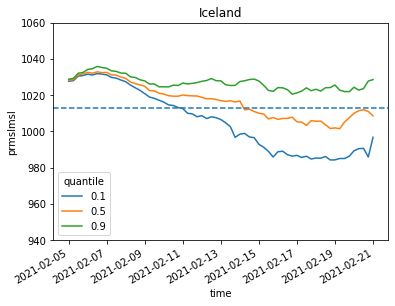

In [ ]:
prmsl_rk.quantile(q=[0.1,0.5,0.9], dim="ens").plot.line(x="time", ylim=[940,1060]);
plt.axhline(y=1013, linestyle='--');
plt.title("Iceland")

In [ ]:
# Azores 38.79977361718643, -29.03531216389184
prmsl_az = prmsl.sel(lat=38.8,lon=-29.0,method='nearest').load() /100;

Text(0.5, 1.0, 'Azores')

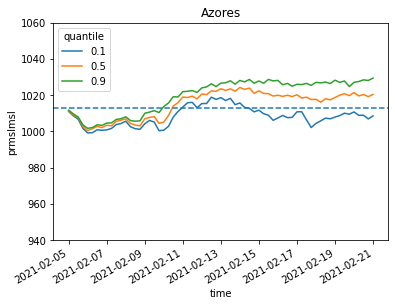

In [ ]:
prmsl_az.quantile(q=[0.1,0.5,0.9], dim="ens").plot.line(x="time", ylim=[940,1060]);
plt.axhline(y=1013, linestyle='--');
plt.title("Azores")

In [ ]:
nao = (prmsl_az - prmsl_rk)

In [ ]:
nao

<xarray.DataArray 'prmslmsl' (ens: 31, time: 65)>
array([[-16.98999  , -19.529968 , -23.687927 , ...,  36.091125 ,
         40.71521  ,  47.990356 ],
       [-16.585999 , -19.670044 , -23.949951 , ...,  -1.907959 ,
        -11.65802  , -14.17395  ],
       [-16.772034 , -19.330017 , -23.002014 , ...,   3.654419 ,
          5.8063965,  10.740784 ],
       ...,
       [-15.727905 , -19.216064 , -24.191956 , ...,  -8.966003 ,
        -10.656006 , -10.283997 ],
       [-16.783997 , -19.569946 , -22.981995 , ...,   8.429993 ,
          5.0220337,   4.2059937],
       [-16.435974 , -18.858093 , -23.180054 , ...,  -1.75     ,
          2.6080322,  10.348022 ]], dtype=float32)
Coordinates:
  * ens      (ens) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 27.0 28.0 29.0 30.0 31.0
  * time     (time) datetime64[ns] 2021-02-05 2021-02-05T06:00:00 ... 2021-02-21
    lon      float64 0.0

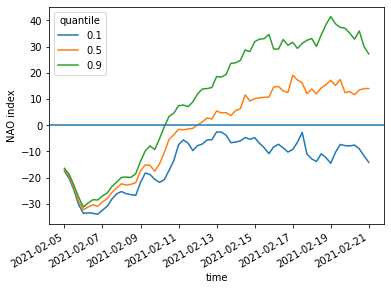

In [ ]:
nao.quantile(q=[0.1,0.5,0.9], dim="ens").plot.line(x="time");
plt.ylabel("NAO index")
plt.axhline(0.0)

In [ ]:
tmp2m = ds.tmp2m
tmp2m

<xarray.DataArray 'tmp2m' (ens: 31, time: 65, lat: 361, lon: 720)>
[523738800 values with dtype=float32]
Coordinates:
  * ens      (ens) float64 1.0 2.0 3.0 4.0 5.0 6.0 ... 27.0 28.0 29.0 30.0 31.0
  * time     (time) datetime64[ns] 2021-01-20 2021-01-20T06:00:00 ... 2021-02-05
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 ... 357.5 358.0 358.5 359.0 359.5
Attributes:
    long_name:  ** 2 m above ground temperature [k]

In [ ]:
%%time
tmp2m.load()

CPU times: user 7.64 s, sys: 62.3 ms, total: 7.7 s
Wall time: 7.74 s


<xarray.DataArray 'tmp2m' (ens: 31, time: 65, lat: 361, lon: 720)>
array([[[[246.63086, 246.63086, 246.63086, ..., 246.63086, 246.63086,
          246.63086],
         [246.69086, 246.68085, 246.68085, ..., 246.69086, 246.69086,
          246.69086],
         [247.03085, 247.02086, 247.00085, ..., 247.06085, 247.05086,
          247.04085],
         ...,
         [247.90085, 247.88086, 247.86086, ..., 247.95085, 247.93085,
          247.91086],
         [246.83086, 246.81085, 246.80086, ..., 246.88086, 246.86086,
          246.84085],
         [245.96086, 245.96086, 245.96086, ..., 245.96086, 245.96086,
          245.96086]],

        [[247.24757, 247.24757, 247.24757, ..., 247.24757, 247.24757,
          247.24757],
         [247.27757, 247.28757, 247.28757, ..., 247.26758, 247.27757,
          247.27757],
         [247.15758, 247.15758, 247.15758, ..., 247.16757, 247.15758,
          247.15758],
         ...,
         [248.92757, 248.88757, 248.83757, ..., 249.04758, 249.00757,
          248.96758],
         [246.92757, 246.90758, 246.88757, ..., 246.98758, 246.96758,
          246.94757],
         [246.04758, 246.04758, 246.04758, ..., 246.04758, 246.04758,
          246.04758]],

        [[247.43726, 247.43726, 247.43726, ..., 247.43726, 247.43726,
          247.43726],
         [247.91727, 247.91727, 247.91727, ..., 247.91727, 247.91727,
          247.91727],
         [248.12726, 248.11726, 248.11726, ..., 248.14726, 248.14726,
          248.13725],
         ...,
         [251.50726, 251.45726, 251.40726, ..., 251.66727, 251.61726,
          251.56726],
         [249.41727, 249.40726, 249.37726, ..., 249.48726, 249.46725,
          249.43726],
         [248.32726, 248.32726, 248.32726, ..., 248.32726, 248.32726,
          248.32726]],

        ...,

        [[241.35152, 241.35152, 241.35152, ..., 241.35152, 241.35152,
          241.35152],
         [240.88152, 240.88152, 240.88152, ..., 240.88152, 240.88152,
          240.88152],
         [240.83151, 240.83151, 240.83151, ..., 240.83151, 240.83151,
          240.83151],
         ...,
         [251.99152, 251.97151, 251.95152, ..., 252.05151, 252.03152,
          252.01152],
         [251.29152, 251.28152, 251.27151, ..., 251.30151, 251.30151,
          251.29152],
         [250.92152, 250.92152, 250.92152, ..., 250.92152, 250.92152,
          250.92152]],

        [[239.88794, 239.88794, 239.88794, ..., 239.88794, 239.88794,
          239.88794],
         [240.08794, 240.08794, 240.07794, ..., 240.08794, 240.08794,
          240.08794],
         [240.09795, 240.08794, 240.08794, ..., 240.09795, 240.09795,
          240.09795],
         ...,
         [251.82794, 251.81795, 251.80794, ..., 251.86795, 251.84795,
          251.83794],
         [249.71794, 249.71794, 249.70795, ..., 249.72795, 249.71794,
          249.72795],
         [250.06795, 250.06795, 250.06795, ..., 250.06795, 250.06795,
          250.06795]],

        [[238.94968, 238.94968, 238.94968, ..., 238.94968, 238.94968,
          238.94968],
         [239.03969, 239.03969, 239.03969, ..., 239.04968, 239.04968,
          239.04968],
         [238.81969, 238.80968, 238.80968, ..., 238.82968, 238.82968,
          238.81969],
         ...,
         [251.91968, 251.88968, 251.85968, ..., 251.99968, 251.96968,
          251.93968],
         [251.52968, 251.51968, 251.51968, ..., 251.52968, 251.52968,
          251.52968],
         [251.11967, 251.11967, 251.11967, ..., 251.11967, 251.11967,
          251.11967]]],


       [[[246.52917, 246.52917, 246.52917, ..., 246.52917, 246.52917,
          246.52917],
         [246.79918, 246.78917, 246.77917, ..., 246.82918, 246.81917,
          246.80917],
         [247.76918, 247.73918, 247.69917, ..., 247.87918, 247.83917,
          247.80917],
         ...,
         [247.34917, 247.33917, 247.30917, ..., 247.40918, 247.38918,
          247.36917],
         [246.16917, 246.15918, 246.13918, ..., 246.21918, 246.19917,
          246.18918],
         [245.49918, 245.49918, 245

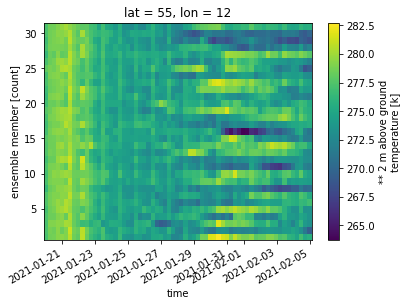

In [ ]:
tmp2m.interp(lat=55,lon=12).plot()

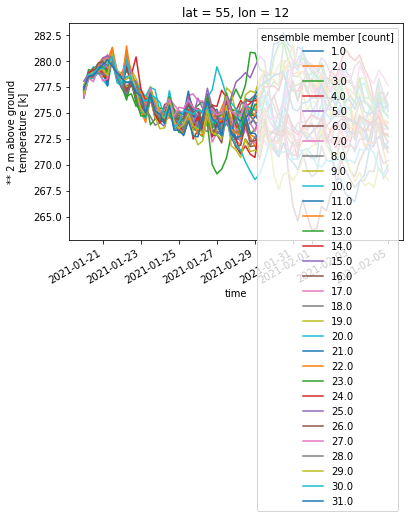

In [ ]:
tmp2m.interp(lat=55,lon=12).plot.line(x="time");

## Aggregation

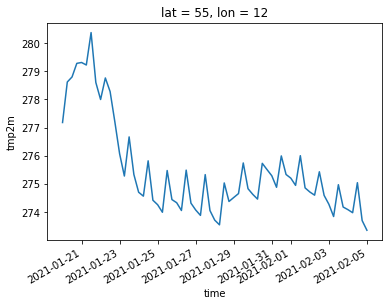

In [ ]:
tmp2m.interp(lat=55,lon=12).mean(dim="ens").plot.line();

In [ ]:
tmp2m.interp(lat=55,lon=12).mean(dim="ens").to_dataframe().to_csv("output.csv")

In [ ]:
type(tmp2m.interp(lat=55,lon=12).mean(dim="ens").values)

numpy.ndarray

In [ ]:
!head output.csv

time,lat,lon,tmp2m
2021-01-20 00:00:00,55,12,277.1825699344758
2021-01-20 06:00:00,55,12,278.6212866998488
2021-01-20 12:00:00,55,12,278.80102834393904
2021-01-20 18:00:00,55,12,279.2831617786038
2021-01-21 00:00:00,55,12,279.31385360225556
2021-01-21 06:00:00,55,12,279.2251764112903
2021-01-21 12:00:00,55,12,280.37571470199094
2021-01-21 18:00:00,55,12,278.6043287707913
2021-01-22 00:00:00,55,12,278.00001771988406


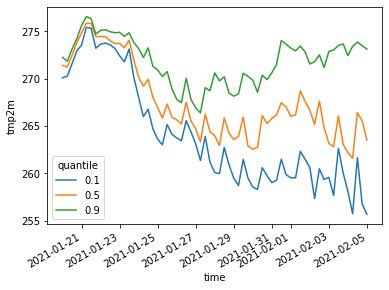

In [ ]:
(tmp2m.interp(lat=60,lon=12)
      .quantile(q=[0.1,0.5,0.9], dim="ens")
      .plot.line(x="time"));

## Save to disk

In [ ]:
dss = tmp2m.sel(lat=slice(40,65), lon=slice(-10,30), ens=1)
dss

<xarray.DataArray 'tmp2m' (time: 65, lat: 51, lon: 61)>
array([[[280.82086, 286.04086, 286.67087, ..., 262.14084, 261.06085,
         261.12085],
        [275.87085, 281.86084, 285.90085, ..., 268.26086, 265.97086,
         264.00085],
        [277.73087, 276.51086, 282.30084, ..., 273.17087, 270.22086,
         268.20087],
        ...,
        [278.42087, 278.39084, 278.42087, ..., 261.50085, 260.72086,
         260.06085],
        [278.07086, 278.04086, 278.01086, ..., 259.00085, 259.11084,
         258.56085],
        [278.00085, 277.95087, 277.93085, ..., 257.82086, 257.53085,
         257.43085]],

       [[279.45758, 285.59756, 286.3376 , ..., 261.82758, 262.40756,
         262.45758],
        [274.8376 , 281.44757, 285.70758, ..., 266.57758, 263.38757,
         262.70758],
        [275.82758, 275.53757, 282.34756, ..., 274.48758, 269.07758,
         265.3076 ],
        ...,
        [277.76758, 277.75757, 277.8076 , ..., 262.0876 , 261.35757,
         260.51758],
        [277.54758, 277.54758, 277.54758, ..., 260.19757, 259.72757,
         258.3076 ],
        [277.68756, 277.64758, 277.60757, ..., 258.75757, 257.99756,
         257.87756]],

       [[285.97726, 285.39725, 286.16727, ..., 272.15726, 272.39725,
         272.66727],
        [283.12726, 284.67725, 285.29727, ..., 276.13727, 273.11725,
         272.67725],
        [282.39725, 283.53726, 284.20724, ..., 277.51727, 275.85727,
         273.71725],
        ...,
        [277.42725, 277.36725, 277.35727, ..., 262.98727, 262.55725,
         262.03726],
        [277.23727, 277.15726, 277.05725, ..., 262.20724, 261.52725,
         260.57727],
        [277.25726, 277.13727, 276.95724, ..., 260.91727, 260.12726,
         259.85727]],

       ...,

       [[290.5215 , 287.21152, 287.22153, ..., 283.28152, 281.50153,
         280.2915 ],
        [286.69153, 287.90152, 286.60153, ..., 285.5815 , 285.13153,
         283.0215 ],
        [285.35153, 287.0415 , 287.00153, ..., 285.74152, 284.85153,
         284.31152],
        ...,
        [275.03152, 275.25153, 275.5115 , ..., 273.6715 , 273.5715 ,
         273.47153],
        [274.84152, 275.10153, 275.37152, ..., 273.53152, 273.43152,
         273.3015 ],
        [274.7615 , 274.9215 , 275.19153, ..., 273.41153, 273.10153,
         272.72153]],

       [[284.83795, 288.27795, 288.45795, ..., 278.98795, 278.36795,
         278.78793],
        [279.58795, 286.73795, 287.88794, ..., 281.40793, 281.32794,
         280.61795],
        [281.68796, 281.29794, 286.25793, ..., 282.42795, 280.59793,
         281.69794],
        ...,
        [275.65793, 275.42795, 275.53793, ..., 273.85794, 273.88794,
         273.90793],
        [275.59793, 275.41794, 275.39795, ..., 273.86795, 273.82794,
         273.81793],
        [275.52795, 275.35794, 275.29794, ..., 273.93796, 273.86795,
         273.76794]],

       [[281.2097 , 286.3397 , 286.8997 , ..., 277.7097 , 276.8397 ,
         276.94968],
        [276.4697 , 284.1797 , 286.31967, ..., 279.84967, 279.03967,
         278.97968],
        [278.40967, 279.7197 , 284.18967, ..., 282.4297 , 280.3997 ,
         280.25967],
        ...,
        [276.6497 , 276.3397 , 276.2197 , ..., 273.8697 , 273.87967,
         273.87967],
        [276.51968, 276.3397 , 276.18967, ..., 273.7497 , 273.7397 ,
         273.72968],
        [276.53967, 276.44968, 276.1797 , ..., 273.6497 , 273.66968,
         273.68967]]], dtype=float32)
Coordinates:
    ens      float64 1.0
  * time     (time) datetime64[ns] 2021-01-20 2021-01-20T06:00:00 ... 2021-02-05
  * lat      (lat) float64 40.0 40.5 41.0 41.5 42.0 ... 63.0 63.5 64.0 64.5 65.0
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 2.5 ... 28.0 28.5 29.0 29.5 30.0
Attributes:
    long_name:  ** 2 m above ground temperature [k]

In [ ]:
dss.to_netcdf("tmp2m_europe_ens_2.nc")

In [ ]:
!ls *.nc -lh

-rw-r--r-- 1 root root 811K Jan 21 10:43 tmp2m_europe_ens_1.nc
-rw-r--r-- 1 root root 811K Jan 21 12:39 tmp2m_europe_ens_2.nc
-rw-r--r-- 1 root root 2.1M Jan 21 12:04 wave_hunter_2020021000.nc


In [ ]:
my_ds = xr.open_dataset("tmp2m_europe_ens_1.nc")
my_ds

<xarray.Dataset>
Dimensions:  (lat: 51, lon: 61, time: 65)
Coordinates:
    ens      float64 ...
  * time     (time) datetime64[ns] 2021-01-20 2021-01-20T06:00:00 ... 2021-02-05
  * lat      (lat) float64 40.0 40.5 41.0 41.5 42.0 ... 63.0 63.5 64.0 64.5 65.0
  * lon      (lon) float64 0.0 0.5 1.0 1.5 2.0 2.5 ... 28.0 28.5 29.0 29.5 30.0
Data variables:
    tmp2m    (time, lat, lon) float32 ...

# DHI data

Ok, now we now that xarray can be used to read public data.

But it can also be useful for our own data, as an alternative to storing data in dfs files.

Some benefits of the NetCDF format:
 * Standard format, for distribution to customer un-familiar with dfs
 * Support for multiple time axes
 * Support for multiple spatial including non-equidistant axes
 * Keep all relevant data in a single file
 * Support for arbitrary metadata

 
 Let's take a look at some output from the Wave Hunter project

In [ ]:
! curl -O https://wavehunter.z6.web.core.windows.net/wave_hunter_2020021000.nc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 2140k  100 2140k    0     0  8631k      0 --:--:-- --:--:-- --:--:-- 8596k


In [ ]:
ds = xr.open_dataset("wave_hunter_2020021000.nc")
ds

<xarray.Dataset>
Dimensions:                  (date: 2, latitude: 16, longitude: 28, time: 121)
Coordinates:
  * time                     (time) datetime64[ns] 2020-02-10 ... 2020-02-15
  * latitude                 (latitude) float64 58.0 58.25 58.5 ... 61.5 61.75
  * longitude                (longitude) float64 -2.0 -1.75 -1.5 ... 4.5 4.75
  * date                     (date) datetime64[ns] 2020-02-10 2020-02-11
Data variables:
    Significant wave height  (time, latitude, longitude) float64 ...
    Mean wave direction      (time, latitude, longitude) float64 ...
    Peak wave period         (time, latitude, longitude) float64 ...
    Zero crossing period     (time, latitude, longitude) float64 ...
    Wind speed               (time, latitude, longitude) float64 ...
    probability              (date, latitude, longitude) float64 ...

The main output from the Wave Hunter project, was a map of probability for the coming two days. To be able to clearly label the temporal axis as a date and not a datetime I think is very helpful. Thus probability uses the `date` dimension.

The probability for the first date in this forecast:

In [ ]:
ds.time

<xarray.DataArray 'time' (time: 121)>
array(['2020-02-10T00:00:00.000000000', '2020-02-10T01:00:00.000000000',
       '2020-02-10T02:00:00.000000000', '2020-02-10T03:00:00.000000000',
       '2020-02-10T04:00:00.000000000', '2020-02-10T05:00:00.000000000',
       '2020-02-10T06:00:00.000000000', '2020-02-10T07:00:00.000000000',
       '2020-02-10T08:00:00.000000000', '2020-02-10T09:00:00.000000000',
       '2020-02-10T10:00:00.000000000', '2020-02-10T11:00:00.000000000',
       '2020-02-10T12:00:00.000000000', '2020-02-10T13:00:00.000000000',
       '2020-02-10T14:00:00.000000000', '2020-02-10T15:00:00.000000000',
       '2020-02-10T16:00:00.000000000', '2020-02-10T17:00:00.000000000',
       '2020-02-10T18:00:00.000000000', '2020-02-10T19:00:00.000000000',
       '2020-02-10T20:00:00.000000000', '2020-02-10T21:00:00.000000000',
       '2020-02-10T22:00:00.000000000', '2020-02-10T23:00:00.000000000',
       '2020-02-11T00:00:00.000000000', '2020-02-11T01:00:00.000000000',
       '2020-02-11T02:00:00.000000000', '2020-02-11T03:00:00.000000000',
       '2020-02-11T04:00:00.000000000', '2020-02-11T05:00:00.000000000',
       '2020-02-11T06:00:00.000000000', '2020-02-11T07:00:00.000000000',
       '2020-02-11T08:00:00.000000000', '2020-02-11T09:00:00.000000000',
       '2020-02-11T10:00:00.000000000', '2020-02-11T11:00:00.000000000',
       '2020-02-11T12:00:00.000000000', '2020-02-11T13:00:00.000000000',
       '2020-02-11T14:00:00.000000000', '2020-02-11T15:00:00.000000000',
       '2020-02-11T16:00:00.000000000', '2020-02-11T17:00:00.000000000',
       '2020-02-11T18:00:00.000000000', '2020-02-11T19:00:00.000000000',
       '2020-02-11T20:00:00.000000000', '2020-02-11T21:00:00.000000000',
       '2020-02-11T22:00:00.000000000', '2020-02-11T23:00:00.000000000',
       '2020-02-12T00:00:00.000000000', '2020-02-12T01:00:00.000000000',
       '2020-02-12T02:00:00.000000000', '2020-02-12T03:00:00.000000000',
       '2020-02-12T04:00:00.000000000', '2020-02-12T05:00:00.000000000',
       '2020-02-12T06:00:00.000000000', '2020-02-12T07:00:00.000000000',
       '2020-02-12T08:00:00.000000000', '2020-02-12T09:00:00.000000000',
       '2020-02-12T10:00:00.000000000', '2020-02-12T11:00:00.000000000',
       '2020-02-12T12:00:00.000000000', '2020-02-12T13:00:00.000000000',
       '2020-02-12T14:00:00.000000000', '2020-02-12T15:00:00.000000000',
       '2020-02-12T16:00:00.000000000', '2020-02-12T17:00:00.000000000',
       '2020-02-12T18:00:00.000000000', '2020-02-12T19:00:00.000000000',
       '2020-02-12T20:00:00.000000000', '2020-02-12T21:00:00.000000000',
       '2020-02-12T22:00:00.000000000', '2020-02-12T23:00:00.000000000',
       '2020-02-13T00:00:00.000000000', '2020-02-13T01:00:00.000000000',
       '2020-02-13T02:00:00.000000000', '2020-02-13T03:00:00.000000000',
       '2020-02-13T04:00:00.000000000', '2020-02-13T05:00:00.000000000',
       '2020-02-13T06:00:00.000000000', '2020-02-13T07:00:00.000000000',
       '2020-02-13T08:00:00.000000000', '2020-02-13T09:00:00.000000000',
       '2020-02-13T10:00:00.000000000', '2020-02-13T11:00:00.000000000',
       '2020-02-13T12:00:00.000000000', '2020-02-13T13:00:00.000000000',
       '2020-02-13T14:00:00.000000000', '2020-02-13T15:00:00.000000000',
       '2020-02-13T16:00:00.000000000', '2020-02-13T17:00:00.000000000',
       '2020-02-13T18:00:00.000000000', '2020-02-13T19:00:00.000000000',
       '2020-02-13T20:00:00.000000000', '2020-02-13T21:00:00.000000000',
       '2020-02-13T22:00:00.000000000', '2020-02-13T23:00:00.000000000',
       '2020-02-14T00:00:00.000000000', '2020-02-14T01:00:00.000000000',
       '2020-02-14T02:00:00.000000000', '2020-02-14T03:00:00.000000000',
       '2020-02-14T04:00:00.000000000', '2020-02-14T05:00:00.000000000',
       '2020-02-14T06:00:00.000000000', '2020-02-14T07:00:00.000000000',
       '2020-02-14T08:00:00.000000000', '2020-02-14T09:00:00.000000000',
       '2020-02-14T10:00:00.000000000', '2020-02-14T11:00:00.000000000',
       '2020-02-14T1

In [ ]:
ds.date

<xarray.DataArray 'date' (date: 2)>
array(['2020-02-10T00:00:00.000000000', '2020-02-11T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * date     (date) datetime64[ns] 2020-02-10 2020-02-11

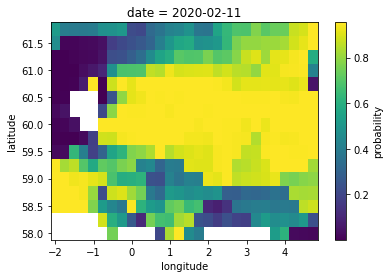

In [ ]:
ds.probability.isel(date=1).plot()

Better to use a static color scale from 0-1.

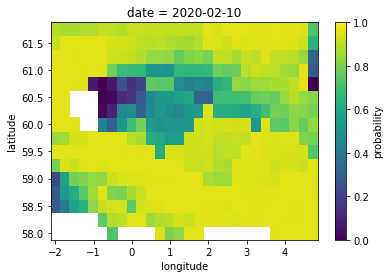

In [ ]:
# Change the scale to [0,1]
ds.probability.isel(date=0).plot(vmin=0.0,vmax=1.0)

The underlying data used in the calculation are also useful to store for retrospective inspection. These are stored with `time` as the temporal dimension.

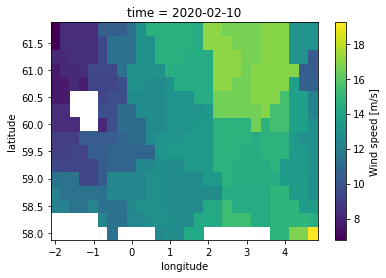

In [ ]:
ds["Wind speed"].isel(time=0).plot()

It is also possible to access the same data using datetime as a string.

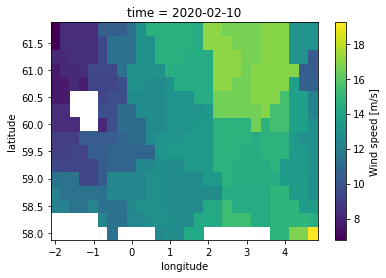

In [ ]:
ds["Wind speed"].sel(time="2020-02-10 00:00").plot()

In order to get a timeseries, we can slice in the two spatial dimensions

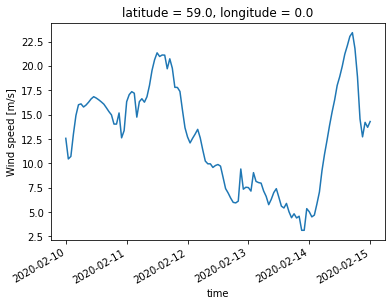

In [ ]:
ds["Wind speed"].sel(latitude=59.0,longitude=0.0).plot()

Calculations can be made similar to how you use NumPy. The result you get is a data-array.

In [ ]:
ds.probability.isel(date=0).max()

<xarray.DataArray 'probability' ()>
array(0.95449947)
Coordinates:
    date     datetime64[ns] 2020-02-10

To get the result in a NumPy array you can use the .values property.

In [ ]:
maxp = ds.probability.isel(date=0).max()


AttributeError: ignored

In [ ]:
maxp

array(0.95449947)

# Random field

In [ ]:
def dist_func(func_type: str, distance: float, length_scale: float) -> float:
    "Correlation as a function of distance"
    w = 0.0
    if func_type == 'exponential':
        w = np.exp(-distance/length_scale)
    else:
        w = np.exp(-0.5 * (distance/ length_scale) ** 2)

    return w

def get_perturbation():

  error_std = 1.0
  h_function = 'gaussian'
  h_scale = 500
  dx = 100
  dy = 100

  lx = 3000
  ly = 2000

  nx = lx // dx
  ny = ly // dy

  n = nx*ny

  x0  = 50000
  y0  = 10000

  x = np.linspace(x0 + dx/2, x0+lx- dx/2,num=nx)
  y = np.linspace(y0 + dy/2 ,y0+ly -dy/2,num=ny)

  xx, yy = np.meshgrid(x,y)
  xx = xx.flatten()
  yy = yy.flatten()

  Q = np.zeros(shape=(n, n))
  d = np.zeros(shape=(n, n))

  for i in range(n):
      for j in range(n):
          d = np.sqrt((xx[i] - xx[j])**2 + (yy[i] - yy[j])**2)
          w = dist_func(h_function,d,h_scale)
          Q[i,j] = error_std**2*w
          
  E = np.random.multivariate_normal(mean=np.zeros(n),cov=Q).reshape(ny,nx)
  return E

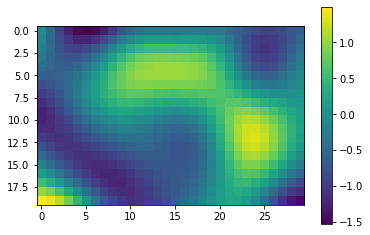

In [ ]:
up = get_perturbation()
vp = get_perturbation()
plt.imshow(up)
plt.colorbar()

In [ ]:
da = xr.DataArray(data=up,
                  dims=('x','y'))
da

<xarray.DataArray (x: 20, y: 30)>
array([[-9.76391201e-02, -5.04092070e-01, -9.02128829e-01,
        -1.23523441e+00, -1.45527788e+00, -1.53350910e+00,
        -1.46776984e+00, -1.28380907e+00, -1.02968390e+00,
        -7.63808849e-01, -5.39328558e-01, -3.89510738e-01,
        -3.19559869e-01, -3.08592363e-01, -3.21533810e-01,
        -3.26109095e-01, -3.07373438e-01, -2.73190716e-01,
        -2.48482160e-01, -2.61596114e-01, -3.29753043e-01,
        -4.50323932e-01, -6.01201698e-01, -7.49026097e-01,
        -8.60913017e-01, -9.14740824e-01, -9.04512084e-01,
        -8.39796954e-01, -7.40685905e-01, -6.31235220e-01],
       [-1.66704630e-01, -5.10744864e-01, -8.32936604e-01,
        -1.08207260e+00, -1.21666452e+00, -1.21559002e+00,
        -1.08418641e+00, -8.53694207e-01, -5.73790111e-01,
        -2.99875411e-01, -7.84918308e-02,  6.47133720e-02,
         1.30230803e-01,  1.40765148e-01,  1.29116689e-01,
         1.22455295e-01,  1.29643095e-01,  1.37354657e-01,
         1.16898276e-01,  3.86558748e-02, -1.12472717e-01,
        -3.27454099e-01, -5.73234741e-01, -8.02170273e-01,
        -9.66828190e-01, -1.03468281e+00, -9.97708140e-01,
        -8.73945217e-01, -7.01114250e-01, -5.25289111e-01],
       [-2.31151917e-01, -5.03801077e-01, -7.44352351e-01,
        -9.09018940e-01, -9.63473604e-01, -8.93121189e-01,
        -7.08627879e-01, -4.44284088e-01, -1.49307663e-01,
         1.25302051e-01,  3.40212701e-01,  4.77199274e-01,
         5.41459774e-01,  5.55926825e-01,  5.49432667e-01,
         5.43007002e-01,  5.39729247e-01,  5.22591003e-01,
         4.61772933e-01,  3.28697807e-01,  1.11143980e-01,
        -1.76906215e-01, -4.94886544e-01, -7.85279804e-01,
        -9.90196184e-01, -1.06939028e+00, -1.01352353e+00,
        -8.47844006e-01, -6.24801421e-01, -4.08488373e-01],
       [-3.15041844e-01, -5.06017820e-01, -6.58559608e-01,
        -7.38928157e-01, -7.20766987e-01, -5.94787984e-01,
        -3.74312241e-01, -9.35830327e-02,  2.01169008e-01,
         4.64759489e-01,  6.65345633e-01,  7.91592543e-01,
         8.52480632e-01,  8.70239835e-01,  8.69169750e-01,
         8.64330495e-01,  8.54171718e-01,  8.20032531e-01,
         7.33244296e-01,  5.67753348e-01,  3.13826204e-01,
        -1.24415298e-02, -3.67968392e-01, -6.91392332e-01,
        -9.19797462e-01, -1.00851236e+00, -9.47083444e-01,
        -7.64946136e-01, -5.23751119e-01, -2.98837787e-01],
       [-4.37196397e-01, -5.38985586e-01, -5.99140185e-01,
        -5.96426230e-01, -5.13484866e-01, -3.45548203e-01,
        -1.06341839e-01,  1.72727325e-01,  4.50721195e-01,
         6.89463364e-01,  8.64670268e-01,  9.71335704e-01,
         1.02165264e+00,  1.03704740e+00,  1.03785910e+00,
         1.03443528e+00,  1.02240390e+00,  9.83506313e-01,
         8.91951640e-01,  7.24792783e-01,  4.73399028e-01,
         1.52188538e-01, -1.99135406e-01, -5.22194966e-01,
        -7.55061375e-01, -8.52033799e-01, -8.01114840e-01,
        -6.31523583e-01, -4.06745760e-01, -2.04919286e-01],
       [-6.02058802e-01, -6.14654847e-01, -5.83750525e-01,
        -5.02123870e-01, -3.62361316e-01, -1.64112009e-01,
         7.96729427e-02,  3.42160656e-01,  5.89230429e-01,
         7.90448750e-01,  9.28996035e-01,  1.00571688e+00,
         1.03581421e+00,  1.04043657e+00,  1.03731767e+00,
         1.03404175e+00,  1.02557273e+00,  9.95968317e-01,
         9.23489985e-01,  7.88154014e-01,  5.80427929e-01,
         3.08920633e-01,  4.02879187e-03, -2.85507912e-01,
        -5.04456052e-01, -6.09059456e-01, -5.84776160e-01,
        -4.55512934e-01, -2.78596246e-01, -1.26249836e-01],
       [-7.95701489e-01, -7.30353234e-01, -6.19002160e-01,
        -4.68317038e-01, -2.81228888e-01, -6.22240222e-02,
         1.76482440e-01,  4.12995714e-01,  6.20423421e-01,
         7.76132666e-01,  8.70362447e-01,  9.09265305e-01,
         9.10917191e-01,  8.96895132e-01,  8.83933300e-01,
         8.79040053e-01,  8.78749967e-01,  8.71181676e-01,
         8.39439018e-01,  7.65967612e-01,  6.38200556e-01,
       

In [ ]:
da.mean(dim='x')
#da.values.mean(axis=0)

array([-0.38409636, -0.49023934, -0.57832049, -0.63662921, -0.6540362 ,
       -0.62454936, -0.55108845, -0.44624727, -0.32924378, -0.22028324,
       -0.13490617, -0.0806398 , -0.05661331, -0.05506481, -0.06326727,
       -0.06549851, -0.04596946,  0.0064665 ,  0.09272924,  0.19991012,
        0.30280155,  0.37155883,  0.38295873,  0.33001785,  0.22486519,
        0.09311516, -0.03723074, -0.14617573, -0.22599077, -0.27816966])

In [ ]:
u_da = xr.DataArray(data=up,
                  
                  dims=('north','east'),
                  coords={
                      'north' : y,
                      'east' : x
                  },
                  attrs={
                      'long_name': "U velocity perturbation",
                      'units' : 'm/s'
                  })
u_da

<xarray.DataArray (north: 20, east: 30)>
array([[-9.76391201e-02, -5.04092070e-01, -9.02128829e-01,
        -1.23523441e+00, -1.45527788e+00, -1.53350910e+00,
        -1.46776984e+00, -1.28380907e+00, -1.02968390e+00,
        -7.63808849e-01, -5.39328558e-01, -3.89510738e-01,
        -3.19559869e-01, -3.08592363e-01, -3.21533810e-01,
        -3.26109095e-01, -3.07373438e-01, -2.73190716e-01,
        -2.48482160e-01, -2.61596114e-01, -3.29753043e-01,
        -4.50323932e-01, -6.01201698e-01, -7.49026097e-01,
        -8.60913017e-01, -9.14740824e-01, -9.04512084e-01,
        -8.39796954e-01, -7.40685905e-01, -6.31235220e-01],
       [-1.66704630e-01, -5.10744864e-01, -8.32936604e-01,
        -1.08207260e+00, -1.21666452e+00, -1.21559002e+00,
        -1.08418641e+00, -8.53694207e-01, -5.73790111e-01,
        -2.99875411e-01, -7.84918308e-02,  6.47133720e-02,
         1.30230803e-01,  1.40765148e-01,  1.29116689e-01,
         1.22455295e-01,  1.29643095e-01,  1.37354657e-01,
         1.16898276e-01,  3.86558748e-02, -1.12472717e-01,
        -3.27454099e-01, -5.73234741e-01, -8.02170273e-01,
        -9.66828190e-01, -1.03468281e+00, -9.97708140e-01,
        -8.73945217e-01, -7.01114250e-01, -5.25289111e-01],
       [-2.31151917e-01, -5.03801077e-01, -7.44352351e-01,
        -9.09018940e-01, -9.63473604e-01, -8.93121189e-01,
        -7.08627879e-01, -4.44284088e-01, -1.49307663e-01,
         1.25302051e-01,  3.40212701e-01,  4.77199274e-01,
         5.41459774e-01,  5.55926825e-01,  5.49432667e-01,
         5.43007002e-01,  5.39729247e-01,  5.22591003e-01,
         4.61772933e-01,  3.28697807e-01,  1.11143980e-01,
        -1.76906215e-01, -4.94886544e-01, -7.85279804e-01,
        -9.90196184e-01, -1.06939028e+00, -1.01352353e+00,
        -8.47844006e-01, -6.24801421e-01, -4.08488373e-01],
       [-3.15041844e-01, -5.06017820e-01, -6.58559608e-01,
        -7.38928157e-01, -7.20766987e-01, -5.94787984e-01,
        -3.74312241e-01, -9.35830327e-02,  2.01169008e-01,
         4.64759489e-01,  6.65345633e-01,  7.91592543e-01,
         8.52480632e-01,  8.70239835e-01,  8.69169750e-01,
         8.64330495e-01,  8.54171718e-01,  8.20032531e-01,
         7.33244296e-01,  5.67753348e-01,  3.13826204e-01,
        -1.24415298e-02, -3.67968392e-01, -6.91392332e-01,
        -9.19797462e-01, -1.00851236e+00, -9.47083444e-01,
        -7.64946136e-01, -5.23751119e-01, -2.98837787e-01],
       [-4.37196397e-01, -5.38985586e-01, -5.99140185e-01,
        -5.96426230e-01, -5.13484866e-01, -3.45548203e-01,
        -1.06341839e-01,  1.72727325e-01,  4.50721195e-01,
         6.89463364e-01,  8.64670268e-01,  9.71335704e-01,
         1.02165264e+00,  1.03704740e+00,  1.03785910e+00,
         1.03443528e+00,  1.02240390e+00,  9.83506313e-01,
         8.91951640e-01,  7.24792783e-01,  4.73399028e-01,
         1.52188538e-01, -1.99135406e-01, -5.22194966e-01,
        -7.55061375e-01, -8.52033799e-01, -8.01114840e-01,
        -6.31523583e-01, -4.06745760e-01, -2.04919286e-01],
       [-6.02058802e-01, -6.14654847e-01, -5.83750525e-01,
        -5.02123870e-01, -3.62361316e-01, -1.64112009e-01,
         7.96729427e-02,  3.42160656e-01,  5.89230429e-01,
         7.90448750e-01,  9.28996035e-01,  1.00571688e+00,
         1.03581421e+00,  1.04043657e+00,  1.03731767e+00,
         1.03404175e+00,  1.02557273e+00,  9.95968317e-01,
         9.23489985e-01,  7.88154014e-01,  5.80427929e-01,
         3.08920633e-01,  4.02879187e-03, -2.85507912e-01,
        -5.04456052e-01, -6.09059456e-01, -5.84776160e-01,
        -4.55512934e-01, -2.78596246e-01, -1.26249836e-01],
       [-7.95701489e-01, -7.30353234e-01, -6.19002160e-01,
        -4.68317038e-01, -2.81228888e-01, -6.22240222e-02,
         1.76482440e-01,  4.12995714e-01,  6.20423421e-01,
         7.76132666e-01,  8.70362447e-01,  9.09265305e-01,
         9.10917191e-01,  8.96895132e-01,  8.83933300e-01,
         8.79040053e-01,  8.78749967e-01,  8.71181676e-01,
         8.39439018e-01,  7.65967612e-01,  6.38200556e-01,


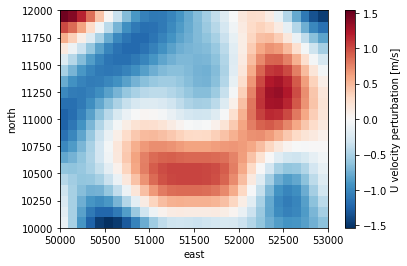

In [ ]:
u_da.plot()

In [ ]:
v_da = xr.DataArray(data=vp,
                  
                  dims=('north','east'),
                  coords={
                      'north' : y,
                      'east' : x
                  },
                  attrs={
                      'long_name' : 'V velocity perturbation',
                      'units' : 'm/s',
                      'author': "JEM"
                      
                  })

uv_ds = xr.Dataset(
    {"u10_p": u_da,
     "v10_p": v_da
     })

In [ ]:
uv_ds

<xarray.Dataset>
Dimensions:  (east: 30, north: 20)
Coordinates:
  * north    (north) float64 1.005e+04 1.015e+04 ... 1.185e+04 1.195e+04
  * east     (east) float64 5.005e+04 5.015e+04 ... 5.285e+04 5.295e+04
Data variables:
    u10_p    (north, east) float64 -0.09764 -0.5041 -0.9021 ... -1.332 -1.455
    v10_p    (north, east) float64 -0.6873 -0.6574 -0.6135 ... 0.2125 0.3961

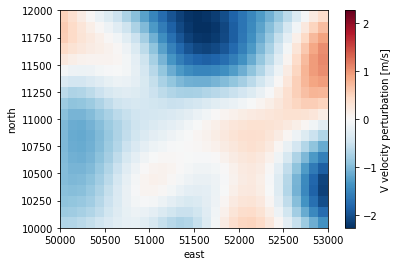

In [ ]:
uv_ds.v10_p.plot()

In [ ]:
v_trend = xr.DataArray(data=[0,5.0],
                  dims=['east'],
                  coords={'east' : [x[0], x[-1]]
                  })

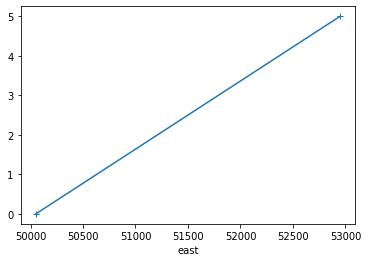

In [ ]:
v_trend.plot(marker="+")

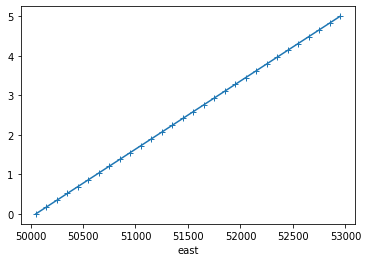

In [ ]:
v_trend.interp_like(uv_ds).plot(marker="+")

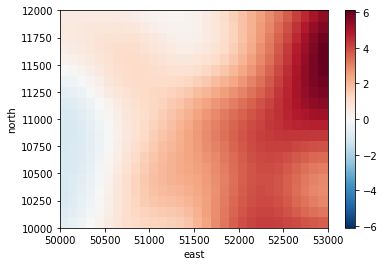

In [ ]:
vtrnd_i= v_trend.interp_like(uv_ds)
(uv_ds.v10_p + vtrnd_i ).plot()

# This is the end